


# IMPORTING PYTHON LIBRARIES FOR ANALYSIS

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READING THE CSV FILES

In [90]:
df_beneficiary = pd.read_csv('DE1_0_2009_Beneficiary_Summary_File_Sample_20.csv')
df_claims = pd.read_csv('DE1_0_2008_to_2010_Outpatient_Claims_Sample_20.csv')

/tmp/ipython-input-723736566.py:2: DtypeWarning: Columns (21,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_claims = pd.read_csv('DE1_0_2008_to_2010_Outpatient_Claims_Sample_20.csv')


# DATA CLEANING


In [91]:
df_beneficiary.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,000002F7E0A96C32,19190701,NaN,2,2,0,5,400,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00001C24EE7B06AC,19360501,NaN,1,1,0,11,530,12,12,...,2,0.0,0.0,0.0,200.0,40.0,0.0,800.0,260.0,0.0
2,000072CF62193213,19310401,NaN,2,1,0,34,120,12,12,...,2,0.0,0.0,0.0,130.0,70.0,0.0,440.0,30.0,50.0
3,0000DCD33779ED8A,19420501,NaN,2,2,0,11,190,12,12,...,2,0.0,0.0,0.0,90.0,20.0,0.0,930.0,200.0,0.0
4,0000F1EB530967F3,19350401,NaN,2,1,0,23,720,12,12,...,2,0.0,0.0,0.0,70.0,200.0,0.0,4950.0,1340.0,0.0


In [92]:
df_beneficiary.duplicated().sum()

np.int64(0)

In [93]:
df_claims.duplicated().sum()

np.int64(0)

In [94]:
display(df_beneficiary.isnull().sum())

,0
DESYNPUF_ID,0
BENE_BIRTH_DT,0
BENE_DEATH_DT,112811
BENE_SEX_IDENT_CD,0
BENE_RACE_CD,0
BENE_ESRD_IND,0
SP_STATE_CODE,0
BENE_COUNTY_CD,0
BENE_HI_CVRAGE_TOT_MONS,0
BENE_SMI_CVRAGE_TOT_MONS,0


In [95]:
# Drop rows with remaining NaN values, excluding 'BENE_DEATH_DT'
df_beneficiary.dropna(subset=[col for col in df_beneficiary.columns if col != 'BENE_DEATH_DT'], inplace=True)
display(df_beneficiary.isnull().sum())

,0
DESYNPUF_ID,0
BENE_BIRTH_DT,0
BENE_DEATH_DT,112811
BENE_SEX_IDENT_CD,0
BENE_RACE_CD,0
BENE_ESRD_IND,0
SP_STATE_CODE,0
BENE_COUNTY_CD,0
BENE_HI_CVRAGE_TOT_MONS,0
BENE_SMI_CVRAGE_TOT_MONS,0


In [96]:
# Dropping Columns that are not relevant
ip_car_columns_to_drop = [
    'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP',
    'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR'
]

df_beneficiary.drop(columns=ip_car_columns_to_drop, inplace=True)

display(df_beneficiary.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114641 entries, 0 to 114640
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DESYNPUF_ID               114641 non-null  object 
 1   BENE_BIRTH_DT             114641 non-null  int64  
 2   BENE_DEATH_DT             1830 non-null    float64
 3   BENE_SEX_IDENT_CD         114641 non-null  int64  
 4   BENE_RACE_CD              114641 non-null  int64  
 5   BENE_ESRD_IND             114641 non-null  object 
 6   SP_STATE_CODE             114641 non-null  int64  
 7   BENE_COUNTY_CD            114641 non-null  int64  
 8   BENE_HI_CVRAGE_TOT_MONS   114641 non-null  int64  
 9   BENE_SMI_CVRAGE_TOT_MONS  114641 non-null  int64  
 10  BENE_HMO_CVRAGE_TOT_MONS  114641 non-null  int64  
 11  PLAN_CVRG_MOS_NUM         114641 non-null  int64  
 12  SP_ALZHDMTA               114641 non-null  int64  
 13  SP_CHF                    114641 non-null  i

None

## Identify chronic condition columns

### Subtask:
Identify the columns in `df_beneficiary` that represent chronic conditions.


In [97]:
df_beneficiary.rename(columns={
    'SP_ALZHDMTA': 'Alzheimer',
    'SP_CHF': 'Heart Failure',
    'SP_CHRNKIDN': 'Kidney Disease',
    'SP_CNCR': 'Cancer',
    'SP_COPD': 'COPD',
    'SP_DEPRESSN': 'Depression',
    'SP_DIABETES': 'Diabetes',
    'SP_ISCHMCHT': 'Heart Disease',
    'SP_OSTEOPRS': 'Osteoporosis',
    'SP_RA_OA': 'Arthritis',
    'SP_STRKETIA': 'Stroke'
}, inplace =True)

chronic_condition_cols = [
    'Alzheimer', 'Heart Failure', 'Kidney Disease', 'Cancer', 'COPD',
    'Depression', 'Diabetes', 'Heart Disease', 'Osteoporosis', 'Arthritis',
    'Stroke'
]

print("Chronic condition columns:", chronic_condition_cols)
display (df_beneficiary)

Chronic condition columns: ['Alzheimer', 'Heart Failure', 'Kidney Disease', 'Cancer', 'COPD', 'Depression', 'Diabetes', 'Heart Disease', 'Osteoporosis', 'Arthritis', 'Stroke']


,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,COPD,Depression,Diabetes,Heart Disease,Osteoporosis,Arthritis,Stroke,MEDREIMB_OP,BENRES_OP,PPPYMT_OP
0,000002F7E0A96C32,19190701,NaN,2,2,0,5,400,0,0,...,2,2,2,2,2,2,2,0.0,0.0,0.0
1,00001C24EE7B06AC,19360501,NaN,1,1,0,11,530,12,12,...,2,2,2,1,2,2,2,200.0,40.0,0.0
2,000072CF62193213,19310401,NaN,2,1,0,34,120,12,12,...,2,2,2,2,2,2,2,130.0,70.0,0.0
3,0000DCD33779ED8A,19420501,NaN,2,2,0,11,190,12,12,...,2,2,2,2,2,2,2,90.0,20.0,0.0
4,0000F1EB530967F3,19350401,NaN,2,1,0,23,720,12,12,...,2,1,1,1,1,1,2,70.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114636,FFFD8472E348E5A5,19320501,NaN,1,1,0,50,160,12,12,...,2,2,2,2,2,2,2,0.0,0.0,0.0
114637,FFFDAE0529142D0C,19330601,NaN,1,1,0,36,310,12,12,...,2,2,2,1,2,2,2,2920.0,1120.0,0.0
114638,FFFDE6371A8EAF51,19401101,NaN,2,1,0,5,200,12,12,...,2,2,1,1,2,2,2,570.0,260.0,0.0
114639,FFFDF515B7CD464E,19261101,NaN,1,1,0,5,510,12,12,...,2,2,2,2,2,2,2,0.0,0.0,0.0


## Create chronic illness combination column

### Subtask:
Create a new column in `df_beneficiary` that concatenates the names of the chronic conditions for each beneficiary if they have the condition. Assuming 1 = True and 2 = False


In [98]:
def combine_chronic_conditions(row):
    present_conditions = []
    for col in chronic_condition_cols:
        if row[col] == 1.0:
            present_conditions.append(col)
    return ','.join(present_conditions)

df_beneficiary['Chronic_Illness_Combination'] = df_beneficiary.apply(combine_chronic_conditions, axis=1)

display(df_beneficiary[['DESYNPUF_ID', 'Chronic_Illness_Combination']].head())

,DESYNPUF_ID,Chronic_Illness_Combination
0,000002F7E0A96C32,
1,00001C24EE7B06AC,Heart Disease
2,000072CF62193213,
3,0000DCD33779ED8A,"Alzheimer,Heart Failure,Cancer"
4,0000F1EB530967F3,"Alzheimer,Heart Failure,Cancer,Depression,Diab..."


## Categorize multiple chronic conditions

### Subtask:
If a beneficiary has three or more chronic conditions, categorize their chronic illness combination as "Multiple".


In [99]:
def categorize_chronic_illness(combination_string):
    if not combination_string:
        return ""
    conditions = combination_string.split(',')
    if len(conditions) >= 3:
        return "Multiple"
    else:
        return combination_string

df_beneficiary['Chronic_Illness_Combination'] = df_beneficiary['Chronic_Illness_Combination'].apply(categorize_chronic_illness)

display(df_beneficiary[['DESYNPUF_ID', 'Chronic_Illness_Combination']].head())

,DESYNPUF_ID,Chronic_Illness_Combination
0,000002F7E0A96C32,
1,00001C24EE7B06AC,Heart Disease
2,000072CF62193213,
3,0000DCD33779ED8A,Multiple
4,0000F1EB530967F3,Multiple


Standardizing dates and dropping columns that were combined

In [100]:
# Convert date columns to datetime objects
df_beneficiary['BENE_BIRTH_DT'] = pd.to_datetime(df_beneficiary['BENE_BIRTH_DT'], format='%Y%m%d', errors='coerce')
df_beneficiary['BENE_DEATH_DT'] = pd.to_datetime(df_beneficiary['BENE_DEATH_DT'], format='%Y%m%d', errors='coerce')

# Drop the chronic condition columns
df_beneficiary.drop(columns=chronic_condition_cols, inplace=True)

# Display the info of the dataframe to show the changes
display(df_beneficiary.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114641 entries, 0 to 114640
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   DESYNPUF_ID                  114641 non-null  object        
 1   BENE_BIRTH_DT                114641 non-null  datetime64[ns]
 2   BENE_DEATH_DT                1830 non-null    datetime64[ns]
 3   BENE_SEX_IDENT_CD            114641 non-null  int64         
 4   BENE_RACE_CD                 114641 non-null  int64         
 5   BENE_ESRD_IND                114641 non-null  object        
 6   SP_STATE_CODE                114641 non-null  int64         
 7   BENE_COUNTY_CD               114641 non-null  int64         
 8   BENE_HI_CVRAGE_TOT_MONS      114641 non-null  int64         
 9   BENE_SMI_CVRAGE_TOT_MONS     114641 non-null  int64         
 10  BENE_HMO_CVRAGE_TOT_MONS     114641 non-null  int64         
 11  PLAN_CVRG_MOS_NUM         

None

## Inspect data types for Claims

### Subtask:
Display the data types of each column in `df_claims` to understand how the data is currently represented.


In [101]:
display(df_claims.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790044 entries, 0 to 790043
Data columns (total 76 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DESYNPUF_ID                     790044 non-null  object 
 1   CLM_ID                          790044 non-null  int64  
 2   SEGMENT                         790044 non-null  int64  
 3   CLM_FROM_DT                     779016 non-null  float64
 4   CLM_THRU_DT                     779016 non-null  float64
 5   PRVDR_NUM                       790044 non-null  object 
 6   CLM_PMT_AMT                     790044 non-null  float64
 7   NCH_PRMRY_PYR_CLM_PD_AMT        790044 non-null  float64
 8   AT_PHYSN_NPI                    772604 non-null  float64
 9   OP_PHYSN_NPI                    133737 non-null  float64
 10  OT_PHYSN_NPI                    255940 non-null  float64
 11  NCH_BENE_BLOOD_DDCTBL_LBLTY_AM  790044 non-null  float64
 12  ICD9_DGNS_CD_1  

None

## Handling missing values




In [102]:

display(df_claims.isnull().sum())

,0
DESYNPUF_ID,0
CLM_ID,0
SEGMENT,0
CLM_FROM_DT,11028
CLM_THRU_DT,11028
...,...
HCPCS_CD_41,777643
HCPCS_CD_42,778344
HCPCS_CD_43,779052
HCPCS_CD_44,779650


In [103]:

# Drop rows with missing values in the date columns
df_claims.dropna(subset=['CLM_FROM_DT', 'CLM_THRU_DT'], inplace=True)

# Verify that missing values have been handled
display(df_claims.isnull().sum())

,0
DESYNPUF_ID,0
CLM_ID,0
SEGMENT,0
CLM_FROM_DT,0
CLM_THRU_DT,0
...,...
HCPCS_CD_41,766615
HCPCS_CD_42,767316
HCPCS_CD_43,768024
HCPCS_CD_44,768622


In [104]:

# Step 1: Filter claims to 2009
df_claims['CLM_THRU_DT'] = pd.to_datetime(df_claims['CLM_THRU_DT'],format='%Y%m%d', errors='coerce')
df_claims = df_claims[df_claims['CLM_THRU_DT'].dt.year == 2009]

# Convert date columns to datetime objects
df_claims['CLM_FROM_DT'] = pd.to_datetime(df_claims['CLM_FROM_DT'], format='%Y%m%d', errors='coerce')

# Display the info of the dataframe to show the changes
display(df_claims.info())

<class 'pandas.core.frame.DataFrame'>
Index: 322128 entries, 0 to 790038
Data columns (total 76 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   DESYNPUF_ID                     322128 non-null  object        
 1   CLM_ID                          322128 non-null  int64         
 2   SEGMENT                         322128 non-null  int64         
 3   CLM_FROM_DT                     322128 non-null  datetime64[ns]
 4   CLM_THRU_DT                     322128 non-null  datetime64[ns]
 5   PRVDR_NUM                       322128 non-null  object        
 6   CLM_PMT_AMT                     322128 non-null  float64       
 7   NCH_PRMRY_PYR_CLM_PD_AMT        322128 non-null  float64       
 8   AT_PHYSN_NPI                    321202 non-null  float64       
 9   OP_PHYSN_NPI                    56044 non-null   float64       
 10  OT_PHYSN_NPI                    120395 non-null  float64     

None

## Merge dataframes

### Subtask:
Merge `df_beneficiary` and `df_claims` based on the common identifier (`DESYNPUF_ID`).


**Reasoning**:
Identify and store the relevant columns for claims analysis and display the list.



In [105]:
df_merged = pd.merge(df_beneficiary, df_claims, on='DESYNPUF_ID', how='inner')

display(df_merged.head())
display(df_merged.shape)
display(df_merged.info())


,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00001C24EE7B06AC,1936-05-01,NaT,1,1,0,11,530,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000072CF62193213,1931-04-01,NaT,2,1,0,34,120,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000072CF62193213,1931-04-01,NaT,2,1,0,34,120,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000072CF62193213,1931-04-01,NaT,2,1,0,34,120,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000DCD33779ED8A,1942-05-01,NaT,2,2,0,11,190,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(322128, 91)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322128 entries, 0 to 322127
Data columns (total 91 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   DESYNPUF_ID                     322128 non-null  object        
 1   BENE_BIRTH_DT                   322128 non-null  datetime64[ns]
 2   BENE_DEATH_DT                   2381 non-null    datetime64[ns]
 3   BENE_SEX_IDENT_CD               322128 non-null  int64         
 4   BENE_RACE_CD                    322128 non-null  int64         
 5   BENE_ESRD_IND                   322128 non-null  object        
 6   SP_STATE_CODE                   322128 non-null  int64         
 7   BENE_COUNTY_CD                  322128 non-null  int64         
 8   BENE_HI_CVRAGE_TOT_MONS         322128 non-null  int64         
 9   BENE_SMI_CVRAGE_TOT_MONS        322128 non-null  int64         
 10  BENE_HMO_CVRAGE_TOT_MONS        322128 non-null  int64  

None

# SUMMARIES


### Race Distribution

First, let's see the distribution of races among the Medicare beneficiaries in our data.

Race Distribution:


,count
BENE_RACE_CD,
1,51269
2,6100
3,2028
5,1153


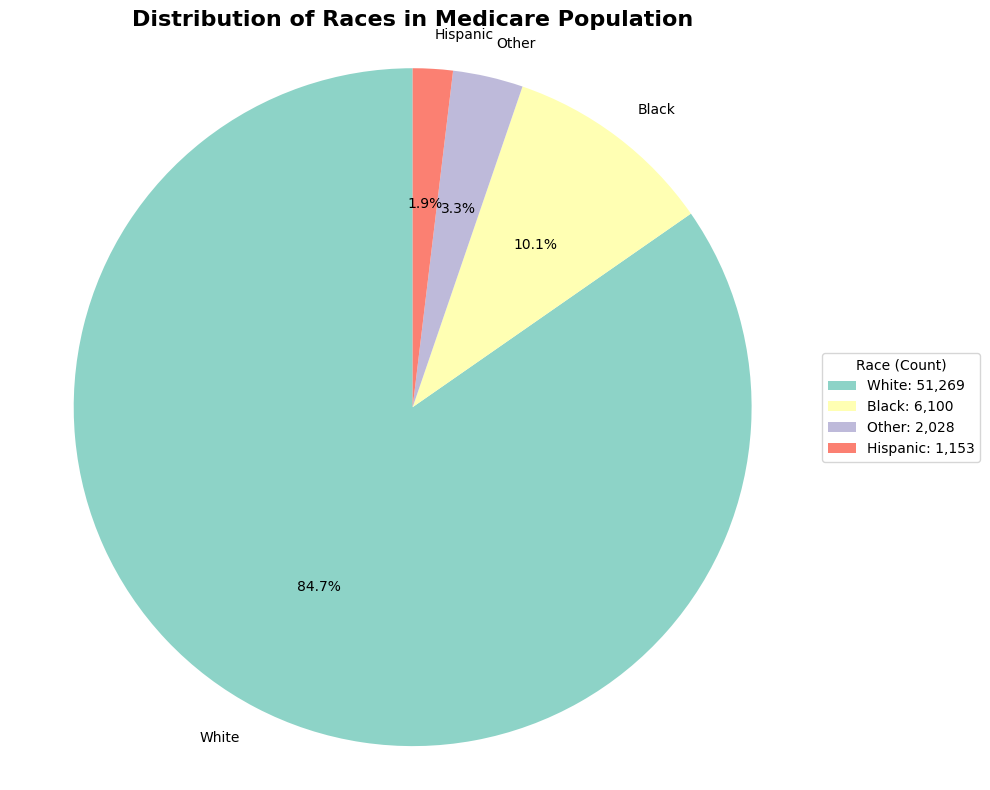

In [106]:
# Filter out 'Multiple' and empty string combinations
filtered_df_merged = df_merged[~df_merged['Chronic_Illness_Combination'].isin(['Multiple', ''])]
race_distribution = filtered_df_merged['BENE_RACE_CD'].value_counts()

# Display the race distribution
print("Race Distribution:")
display(race_distribution)

# Mapping for race codes to readable labels (based on standard CMS coding)

race_labels = {
    1: 'White',
    2: 'Black',
    3: 'Other',
    4: 'Asian',
    5: 'Hispanic',
    6: 'North American Native'
}

# Create labels for the pie chart
labels = [race_labels.get(code, f'Race {code}') for code in race_distribution.index]
sizes = race_distribution.values

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribution of Races in Medicare Population', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle

# Add a legend with counts
legend_labels = [f'{label}: {count:,}' for label, count in zip(labels, sizes)]
plt.legend(legend_labels, title="Race (Count)", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

**Interpretation:** This pie chart shows the racial breakdown of the Medicare members in this sample dataset. We can see that the majority of members are White, followed by Black, Other, and Hispanic individuals. This distribution is important context for understanding the population we are serving.

### Chronic Illness Combination Distribution

Now, let's look at the different combinations of chronic illnesses present in our member population and see which combinations are most common.

,count
Chronic_Illness_Combination,
Heart Disease,7918
"Diabetes,Heart Disease",5831
Diabetes,4462
"Heart Failure,Heart Disease",3730
Depression,2759
...,...
"Osteoporosis,Stroke",31
"Arthritis,Stroke",21
"Kidney Disease,Stroke",20


/tmp/ipython-input-1492460175.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_combinations.index, y=top_10_combinations.values, palette='viridis')


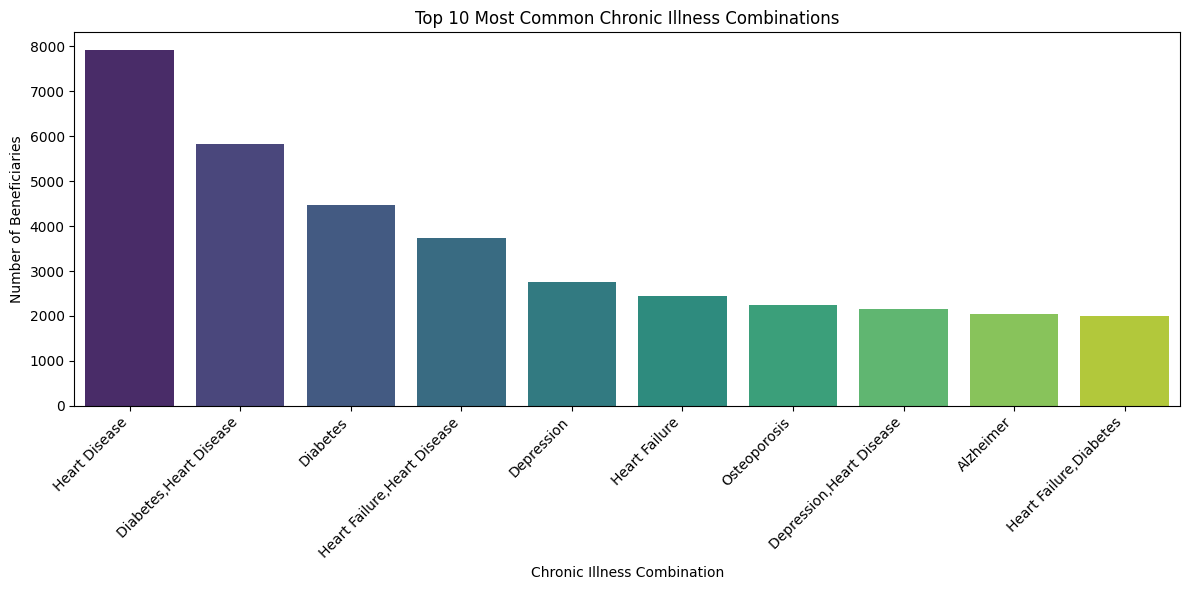

In [107]:


# Calculate the distribution of chronic illness combinations
chronic_illness_distribution = filtered_df_merged['Chronic_Illness_Combination'].value_counts()

# Display the chronic illness distribution
display(chronic_illness_distribution)

# Select the top 10 chronic illness combinations
top_10_combinations = chronic_illness_distribution.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_combinations.index, y=top_10_combinations.values, palette='viridis')
plt.title('Top 10 Most Common Chronic Illness Combinations')
plt.xlabel('Chronic Illness Combination')
plt.ylabel('Number of Beneficiaries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Interpretation:** This list shows the most frequent chronic illness combinations among our members (excluding those categorized as 'Multiple' or having no listed conditions). As noted earlier, "Heart Disease" is the most common single chronic condition listed, followed by combinations involving Diabetes and Heart Disease. Understanding the prevalence of these conditions helps us anticipate healthcare needs and costs.

### Chronic Illness Costs: Total vs. Per Member

Here, we analyze which chronic illness combinations are the most expensive, both in terms of the total amount paid by Medicare and the average cost per member with that combination. We've excluded the 'Multiple' category and those with no listed conditions for this specific analysis to look at more defined combinations.

Top 10 Chronic Illness Combinations by Total Cost :


,CLM_PMT_AMT
Chronic_Illness_Combination,
Heart Disease,1863900.0
"Diabetes,Heart Disease",1293320.0
Diabetes,946360.0
"Heart Failure,Heart Disease",811350.0
Depression,591310.0
Heart Failure,480630.0
Osteoporosis,480300.0
"Depression,Heart Disease",462230.0
Alzheimer,449170.0


/tmp/ipython-input-3620037480.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_total_cost.index, x=(top_10_total_cost.values/1000000), palette='viridis', orient= 'h')


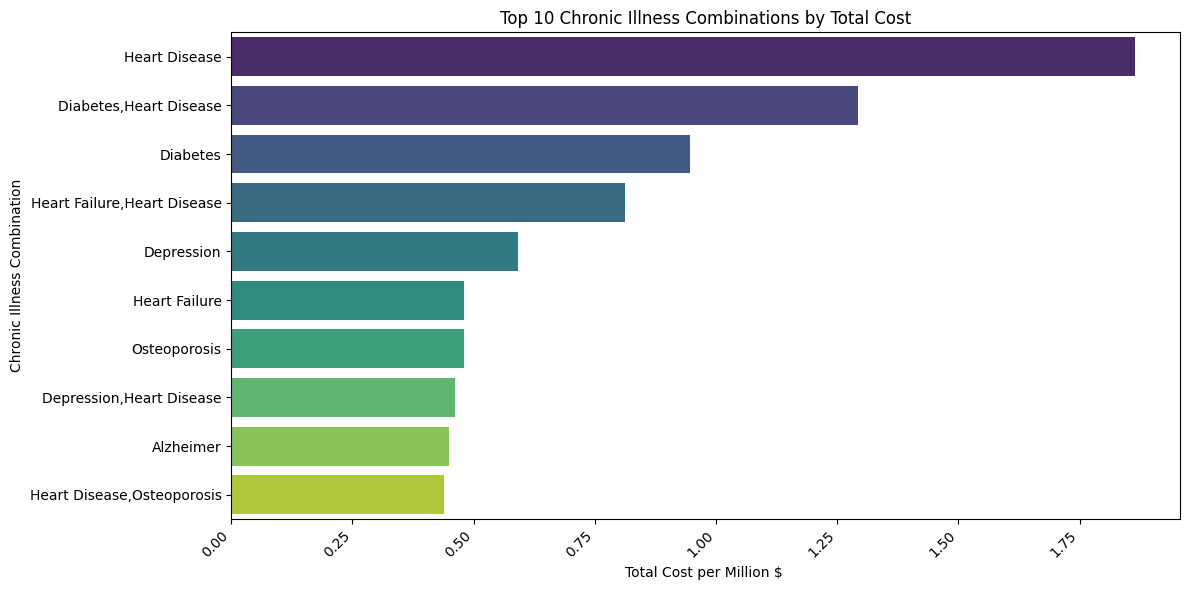


Top 10 Chronic Illness Combinations by Cost per Member:


,0
Chronic_Illness_Combination,
"Arthritis,Stroke",1408.333333
"Cancer,COPD",1279.333333
"Cancer,Stroke",1240.000000
"Kidney Disease,Diabetes",1221.457286
"Heart Failure,Cancer",1157.962963
"Kidney Disease,Cancer",1093.809524
"Diabetes,Stroke",1086.046512
Kidney Disease,1085.380711
"COPD,Stroke",1085.000000


/tmp/ipython-input-3620037480.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_cost_per_member.index, x=top_10_cost_per_member.values, palette='viridis', orient= 'h')


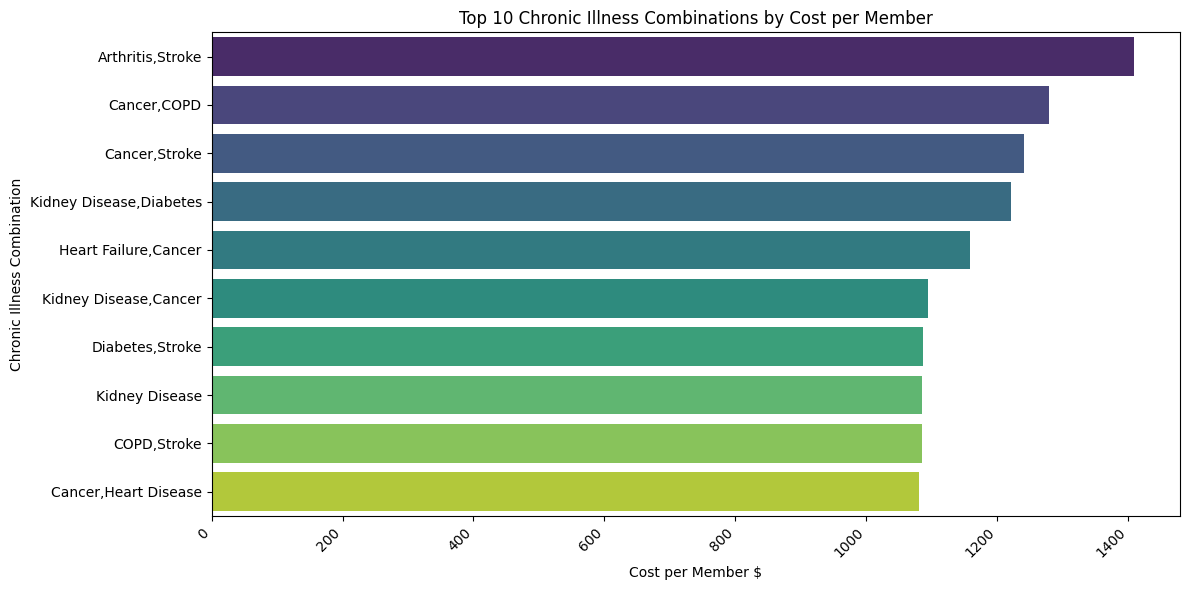

In [108]:

# CLM_PMT_AMT is used as I have calculated based on Medicare's total expenditure.
# Calculate the total cost for each chronic illness combination
total_cost_by_combination = filtered_df_merged.groupby('Chronic_Illness_Combination')['CLM_PMT_AMT'].sum().sort_values(ascending=False)

# Calculate the number of unique beneficiaries for each chronic illness combination
member_counts = filtered_df_merged.groupby('Chronic_Illness_Combination')['DESYNPUF_ID'].nunique()

# Calculate the cost per member for each chronic illness combination
cost_per_member_by_combination = total_cost_by_combination / member_counts
cost_per_member_by_combination = cost_per_member_by_combination.sort_values(ascending=False)

# Display the top 10 chronic illness combinations by total cost and cost per member
print("Top 10 Chronic Illness Combinations by Total Cost :")
# Select the top 10 chronic illness combinations by total cost
top_10_total_cost = total_cost_by_combination.head(10)
display(top_10_total_cost)


# Create a bar plot for total cost
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_total_cost.index, x=(top_10_total_cost.values/1000000), palette='viridis', orient= 'h')
plt.title('Top 10 Chronic Illness Combinations by Total Cost')
plt.ylabel('Chronic Illness Combination')
plt.xlabel('Total Cost per Million $ ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Select the top 10 chronic illness combinations by cost per member
top_10_cost_per_member = cost_per_member_by_combination.head(10)
print("\nTop 10 Chronic Illness Combinations by Cost per Member:")
display(top_10_cost_per_member)


# Create a bar plot for cost per member
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_cost_per_member.index, x=top_10_cost_per_member.values, palette='viridis', orient= 'h')
plt.title('Top 10 Chronic Illness Combinations by Cost per Member')
plt.ylabel('Chronic Illness Combination')
plt.xlabel('Cost per Member $')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Interpretation:**

*   **Total Cost:** The first table shows the top 10 chronic illness combinations with the highest total Medicare payments. As we observed, "Heart Disease" alone has the highest total cost, followed by combinations like "Diabetes, Heart Disease". This highlights which conditions drive the highest overall spending in this dataset.
*   **Cost per Member:** The second table shows the top 10 combinations based on the average Medicare payment per member. This gives a different perspective, indicating which combinations are most expensive on an individual level. It's interesting to note that some combinations with lower total costs might have a higher cost per member, suggesting that while fewer people have that specific combination, their care is particularly expensive.

# BENCHMARKING

In this section, we shift our focus to understanding how costs vary across different healthcare providers for treating chronic illnesses. Benchmarking providers can help identify potential areas where costs are higher than average.

## Calculate cost per member per provider and chronic illness

First, we calculate the average cost for each patient treated by a specific provider for a specific chronic illness combination. This gives us a granular view of costs at the provider-illness level.

In [109]:
# Group by AT_PHYSN_NPI and Chronic_Illness_Combination and calculate sum of CLM_PMT_AMT and count of unique DESYNPUF_ID
grouped_cost_data = filtered_df_merged.groupby(['AT_PHYSN_NPI', 'Chronic_Illness_Combination']).agg(
    total_claim_payment=('CLM_PMT_AMT', 'sum'),
    unique_beneficiaries=('DESYNPUF_ID', 'nunique')
)

# Calculate the cost per member
grouped_cost_data['cost_per_member'] = grouped_cost_data['total_claim_payment'] / grouped_cost_data['unique_beneficiaries']

# Display the results
display(grouped_cost_data.head())

total_claim_payment  \
AT_PHYSN_NPI Chronic_Illness_Combination                        
102408.0     Heart Disease                              200.0   
1005544.0    Alzheimer,Depression                        70.0   
1053861.0    Diabetes                                    10.0   
             Diabetes,Osteoporosis                       30.0   
1569134.0    Diabetes                                    30.0   

                                          unique_beneficiaries  \
AT_PHYSN_NPI Chronic_Illness_Combination                         
102408.0     Heart Disease                                   1   
1005544.0    Alzheimer,Depression                            1   
1053861.0    Diabetes                                        1   
             Diabetes,Osteoporosis                           1   
1569134.0    Diabetes                                        1   

                                          cost_per_member  
AT_PHYSN_NPI Chronic_Illness_Combination                   
102408.0     Heart Disease                          200.0  
1005544.0    Alzheimer,Depression                    70.0  
1053861.0    Diabetes                                10.0  
             Diabetes,Osteoporosis                   30.0  
1569134.0    Diabetes                                30.0

This table shows the results of calculating the cost per member for each unique combination of a healthcare provider and a chronic illness combination.

*   **Rows Represent:** Each row focuses on a specific provider treating members with a specific chronic illness combination.
*   **`total_claim_payment`:** The total amount Medicare paid to this provider for all claims related to this specific chronic illness combination.
*   **`unique_beneficiaries`:** The number of individual Medicare members with this chronic illness combination treated by this provider.
*   **`cost_per_member`:** The average Medicare cost per patient for this provider when treating this specific chronic illness combination (calculated as total payment divided by unique members).

This data allows us to compare the average cost for different providers when treating the same chronic conditions.

## Analyze cost distribution per chronic illness

### Subtask:
For each chronic illness combination, represent the distribution of costs per provider.


,count,mean,std,min,25%,50%,75%,max
Chronic_Illness_Combination,,,,,,,,
"Cancer,Stroke",2.0,620.000000,820.243866,40.0,330.0,620.0,910.0,1200.0
"Arthritis,Stroke",19.0,444.736842,1111.997044,0.0,55.0,90.0,300.0,4900.0
"COPD,Stroke",5.0,434.000000,559.446155,10.0,60.0,100.0,700.0,1300.0
Kidney Disease,519.0,395.260116,709.697847,-20.0,50.0,90.0,300.0,3510.0
"Cancer,COPD",49.0,389.489796,750.982859,0.0,40.0,100.0,300.0,3300.0
"Kidney Disease,Diabetes",651.0,361.129032,697.207777,-60.0,42.5,90.0,300.0,3760.0
"Kidney Disease,Cancer",66.0,348.030303,610.183376,-40.0,50.0,100.0,400.0,3530.0
"Heart Failure,Kidney Disease",236.0,335.614407,652.743428,-10.0,40.0,75.0,300.0,3450.0
"Heart Failure,Cancer",189.0,330.502646,681.829428,-30.0,40.0,80.0,300.0,4900.0


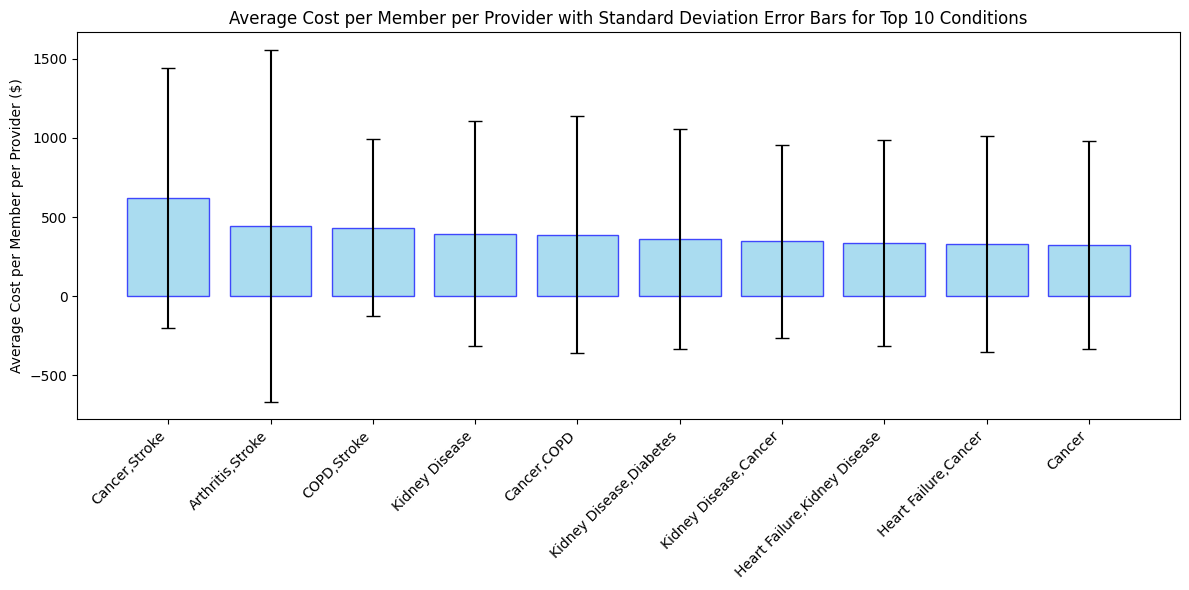

💡 Among the top 10 most expensive conditions per provider, the most variable costs are for 'Arthritis,Stroke' - providers charge very different amounts!


In [110]:
# Calculate descriptive statistics for cost per provider for each chronic illness combination
cost_distribution_by_combination = grouped_cost_data.groupby('Chronic_Illness_Combination')['cost_per_member'].describe()



# Select the top 10 conditions based on the mean cost for the bar plot
top_10_conditions_for_barplot = cost_distribution_by_combination.sort_values(by='mean', ascending=False).head(10)
display(top_10_conditions_for_barplot)

# Extract the mean and standard deviation for the top 10 conditions
conditions = top_10_conditions_for_barplot.index
averages = top_10_conditions_for_barplot['mean']
variability = top_10_conditions_for_barplot['std']


plt.figure(figsize=(12, 6))

# Create bar plot with error bars representing standard deviation
plt.bar(conditions, averages, yerr=variability, capsize=5,
        color='skyblue', alpha=0.7, edgecolor='blue')

plt.ylabel('Average Cost per Member per Provider ($)')
plt.title('Average Cost per Member per Provider with Standard Deviation Error Bars for Top 10 Conditions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Key Insight (based on descriptive stats)
# Identify the condition with the highest standard deviation among the top conditions to highlight variability
most_variable_in_top_10 = top_10_conditions_for_barplot['std'].idxmax()
print(f"💡 Among the top 10 most expensive conditions per provider, the most variable costs are for '{most_variable_in_top_10}' - providers charge very different amounts!")

The table and chart above show the average cost per patient for each chronic illness combination, along with how much those costs typically spread out (the variation) across different providers.

*   **Average Cost:** The height of the bars shows the typical cost.
*   **Cost Variation:** The lines on top of the bars show how much the costs tend to vary. Longer lines mean providers charge very different amounts for that condition, while shorter lines mean costs are more similar across providers.

This helps us understand which conditions are generally more expensive and which ones have the biggest differences in pricing among providers.

## Filtering Combinations with Limited Data

 We filter out combinations of chronic illness and provider where there is only one patient.

In [111]:

filtered_grouped_cost_data = grouped_cost_data[grouped_cost_data['unique_beneficiaries'] > 1].copy()
display(filtered_grouped_cost_data.head())

total_claim_payment  \
AT_PHYSN_NPI Chronic_Illness_Combination                        
2258359.0    Heart Disease                              830.0   
             Heart Failure,Heart Disease                830.0   
3873846.0    Depression                                  80.0   
10097772.0   Diabetes,Heart Disease                     600.0   
11222535.0   Alzheimer                                  130.0   

                                          unique_beneficiaries  \
AT_PHYSN_NPI Chronic_Illness_Combination                         
2258359.0    Heart Disease                                   2   
             Heart Failure,Heart Disease                     2   
3873846.0    Depression                                      2   
10097772.0   Diabetes,Heart Disease                          2   
11222535.0   Alzheimer                                       2   

                                          cost_per_member  
AT_PHYSN_NPI Chronic_Illness_Combination                   
2258359.0    Heart Disease                          415.0  
             Heart Failure,Heart Disease            415.0  
3873846.0    Depression                              40.0  
10097772.0   Diabetes,Heart Disease                 300.0  
11222535.0   Alzheimer                               65.0

## Comparing Cost Distribution Before and After Filtering

We compare the cost distribution before and after filtering out combinations with only one member. This helps us see how removing these less frequent combinations impacts the overall cost picture.

,count,mean,std,min,25%,50%,75%,max
Chronic_Illness_Combination,,,,,,,,
"Diabetes,Stroke",1.0,2585.000000,NaN,2585.000000,2585.000000,2585.000000,2585.000000,2585.0
"Cancer,Osteoporosis",4.0,1025.000000,729.029035,115.000000,805.000000,1042.500000,1262.500000,1900.0
"Heart Failure,Kidney Disease",6.0,852.500000,778.625391,30.000000,172.500000,880.000000,1280.000000,1975.0
"Alzheimer,Cancer",3.0,612.222222,929.286365,55.000000,75.833333,96.666667,890.833333,1685.0
"COPD,Depression",3.0,413.333333,452.944073,120.000000,152.500000,185.000000,560.000000,935.0
"Heart Disease,Arthritis",61.0,386.243169,491.131503,15.000000,80.000000,220.000000,380.000000,2445.0
Arthritis,52.0,369.814103,425.646259,5.000000,70.000000,157.500000,577.500000,1750.0
Kidney Disease,21.0,367.619048,492.901436,15.000000,75.000000,120.000000,335.000000,1790.0
"Cancer,Heart Disease",24.0,359.861111,438.524072,20.000000,108.750000,180.000000,383.750000,1695.0


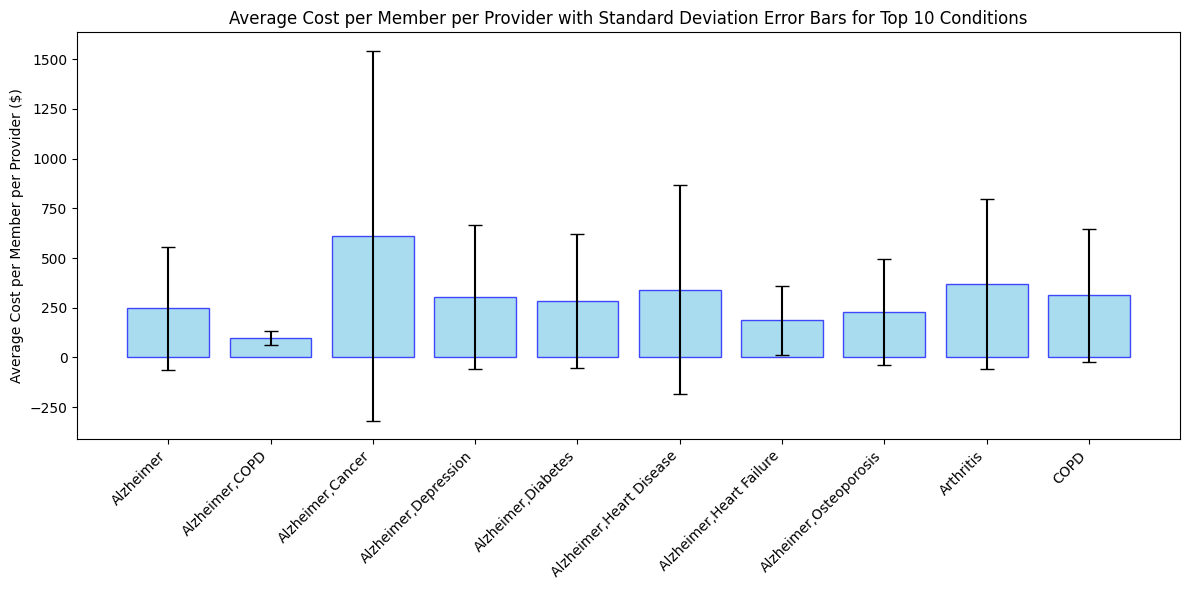

<Figure size 1500x800 with 0 Axes>

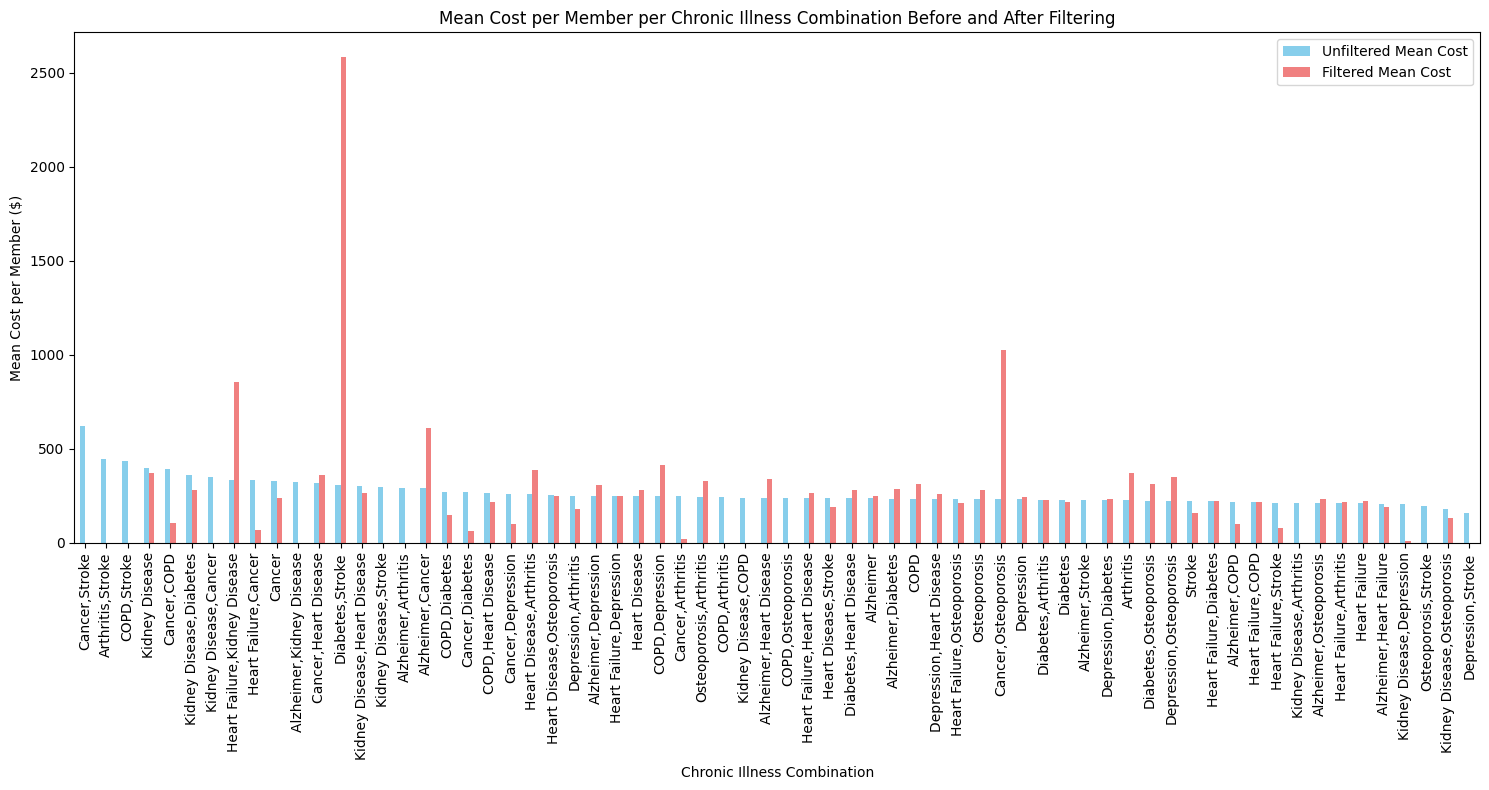

💡 Among the top 10 most expensive conditions per provider, the most variable costs are for 'Alzheimer,Cancer' - providers charge very different amounts!


In [112]:
# Get the mean cost per member per chronic illness combination before filtering
unfiltered_mean_cost = cost_distribution_by_combination['mean']

# Get the mean cost per member per chronic illness combination after filtering
# Calculate describe for filtered data first
cost_distribution_by_filtered_combination = filtered_grouped_cost_data.groupby('Chronic_Illness_Combination')['cost_per_member'].describe()

filtered_mean_cost = cost_distribution_by_filtered_combination['mean']
display(cost_distribution_by_filtered_combination.sort_values(by='mean',ascending=False).head(10))



# Select the top 10 conditions based on the mean cost for the bar plot
top_10_conditions_for_barplot = cost_distribution_by_filtered_combination.head(10)
# Extract the mean and standard deviation for the top 10 conditions
conditions = top_10_conditions_for_barplot.index
averages = top_10_conditions_for_barplot['mean']
variability = top_10_conditions_for_barplot['std']


plt.figure(figsize=(12, 6))

# Create bar plot with error bars representing standard deviation
plt.bar(conditions, averages, yerr=variability, capsize=5,
        color='skyblue', alpha=0.7, edgecolor='blue')

plt.ylabel('Average Cost per Member per Provider ($)')
plt.title('Average Cost per Member per Provider with Standard Deviation Error Bars for Top 10 Conditions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





# Combine the mean costs into a single DataFrame for plotting
comparison_df_cost = pd.DataFrame({
    'Unfiltered Mean Cost': unfiltered_mean_cost,
    'Filtered Mean Cost': filtered_mean_cost
})

# Sort by unfiltered mean cost for better visualization
comparison_df_cost = comparison_df_cost.sort_values(by='Unfiltered Mean Cost', ascending=False)


# Plot the comparison of mean costs
plt.figure(figsize=(15, 8))
comparison_df_cost.plot(kind='bar', figsize=(15, 8), color=['skyblue', 'lightcoral'])
plt.title('Mean Cost per Member per Chronic Illness Combination Before and After Filtering')
plt.xlabel('Chronic Illness Combination')
plt.ylabel('Mean Cost per Member ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

most_variable_in_top_10 = top_10_conditions_for_barplot['std'].idxmax()
print(f"💡 Among the top 10 most expensive conditions per provider, the most variable costs are for '{most_variable_in_top_10}' - providers charge very different amounts!")

This bar plot shows the mean cost per member for each chronic illness combination before and after filtering, illustrating the effect of removing combinations with limited data on the average cost.


This filtering is done to focus on combinations with more data points, which can provide more stable and representative insights into typical provider costs.

As you can see in the comparison visualization above, removing these single-member combinations can impact the average cost and the apparent variability for some chronic illness combinations. Combinations that had many single-member instances might see their average cost change significantly after filtering, especially if those single-member costs were outliers (very high or very low). The number of providers included in the analysis for each chronic illness combination will also decrease for those combinations that had single-member cases.


## Identifying Consistently Expensive Providers

Finally, we identify providers who are consistently more expensive than the average for the chronic illnesses they treat. This approach accounts for the fact that some illnesses are naturally more costly than others, allowing us to pinpoint providers whose costs are high relative to the specific conditions they manage.

This code calculates a metric that represents how much more (or less) each provider charges on average compared to the norm for the chronic illnesses they treat.

Top 10 Consistently Expensive Providers (based on average cost difference using all data):


,cost_difference_from_average
AT_PHYSN_NPI,
8.469095e+09,3291.053835
8.934655e+07,3279.771435
2.320655e+09,3196.053994
4.416445e+09,3114.739884
7.420531e+09,3093.641115
9.225716e+08,3093.641115
9.327041e+09,3090.457176
9.139771e+09,3088.877934
4.749335e+09,3079.771435


/tmp/ipython-input-2433474861.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=consistently_expensive_providers.index, y=consistently_expensive_providers.values, palette='viridis')


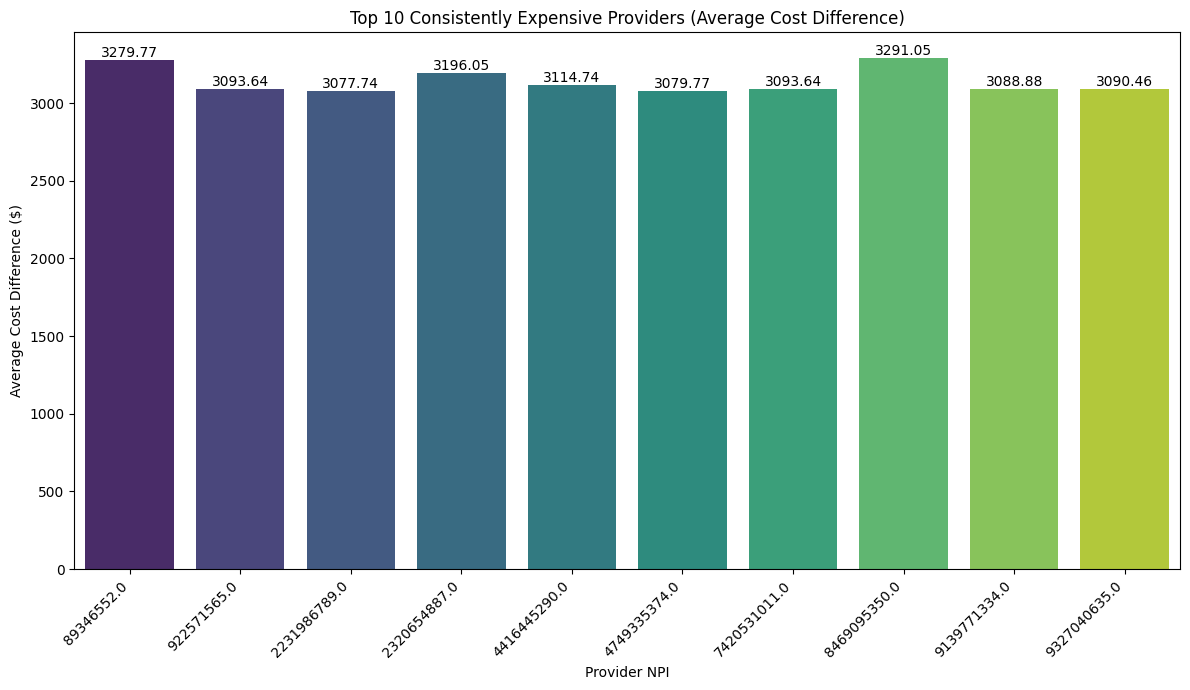

In [113]:
# Calculate the average cost per member for each chronic illness combination across all providers (from grouped_cost_data)
average_cost_per_combination = grouped_cost_data.groupby('Chronic_Illness_Combination')['cost_per_member'].mean()

# Join the average cost back to the grouped_cost_data
grouped_cost_data = grouped_cost_data.join(average_cost_per_combination, on='Chronic_Illness_Combination', rsuffix='_for_combination')

# Calculate the difference between the provider's cost per member and the average for that chronic illness
grouped_cost_data['cost_difference_from_average'] = grouped_cost_data['cost_per_member'] - grouped_cost_data['cost_per_member_for_combination']

# To identify consistently expensive providers, we can average the cost difference for each provider across all chronic illnesses they treat
# Filter out potential NaN values that could arise from combinations not present in average_cost_per_combination (though this should be rare with join)
provider_expensiveness_metric = grouped_cost_data.groupby('AT_PHYSN_NPI')['cost_difference_from_average'].mean().sort_values(ascending=False)

# Identify consistently expensive providers (e.g., top 10)
consistently_expensive_providers = provider_expensiveness_metric.head(10)

# Display the consistently expensive providers
print("Top 10 Consistently Expensive Providers (based on average cost difference using all data):")
display(consistently_expensive_providers)


# Create a simple bar plot for the top consistently expensive providers
plt.figure(figsize=(12, 7)) # Increased figure size slightly for better label spacing
ax = sns.barplot(x=consistently_expensive_providers.index, y=consistently_expensive_providers.values, palette='viridis')
plt.title('Top 10 Consistently Expensive Providers (Average Cost Difference)')
plt.xlabel('Provider NPI')
plt.ylabel('Average Cost Difference ($)')
plt.xticks(rotation=45, ha='right')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') # Format labels to 2 decimal places

plt.tight_layout()
plt.show()

This table shows the top 10 providers who are consistently more expensive based on our analysis. Their average cost difference indicates how much higher their costs are compared to the average for the conditions they treat.